## Question 1: Text Statistics (20 marks)

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
import string
string.punctuation
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from Inverted_Index import Query_Result
plt.style.use('seaborn-whitegrid')

## Interactive function

In [2]:
def eliminate(a, b):
    for word in a:
        del b[word]
    return b

def posterior(a, b):
    probability = np.true_divide(a, b)
    return probability

def reorder(a):
    x = sorted(a, reverse = True)
    return x

def define_item(a):
    first = 0
    second = 0
    first = np.true_divide(a, a + 2000)
    second = np.true_divide(2000, a + 2000)
    return first, second

def define_K(passage_length, average_passage_length):
    
    first_item = 1 - 0.75
    frac_len = np.true_divide(passage_length, average_passage_length)
    second_item = np.multiply(0.75, frac_len)
    latter_item = first_item + second_item
    K = np.multiply(1.2, latter_item)
    return K

def define_log_lastitem(qfm, nm, N):
    # Calculate the first item
    top_element = N - nm + 0.5
    down_element = nm + 0.5
    frac_value = np.true_divide(top_element, down_element)
    log_value = np.log(frac_value)
    # Calculate the last item
    last_item = np.true_divide((100 + 1) * qfm, 100 + qfm)
    S = np.multiply(log_value, last_item)
    return S

def check_frequency(element, pid):
    if element not in pid:
        frequency = 0
    else:
        frequency = pid[element]
    return frequency

In [2]:
# Read the passage collection txt
passage_file = open('passage_collection_new.txt', 'r', encoding = 'utf-8') 
lines = passage_file.readlines()

In [3]:
# Define the final answer dictionary
answer = defaultdict(int) 
sentence_list = []
# Use the stopwords package
stop_words = set(stopwords.words('english'))

# Split the sentence to each words
for sentence in lines:
    # Only remain the english words 
    # Remove the URL link (Regular expression)
    # sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
    # Split the line, Remove the whitespaces and Convert each words into the type of lower case
    sentence = nltk.word_tokenize(sentence.lower())
    # Remove the punctuations
    sentence = [word for word in sentence if word not in string.punctuation]
    # Remove the digits (search whether the word contain the digits) => type None or string
    sentence = [word for word in sentence if re.search('\d', word) == None] 
    # Append the list
    sentence_list += sentence
    
# # Remove the single alphabet
# sentence_list = [word for word in sentence_list if len(word) > 1]

In [4]:
# Define the final list
Final = []

# Import the PrterStemmer
stemming = PorterStemmer()

# Add the stemming procedure
for word in sentence_list:
    Final.append(stemming.stem(word))

In [5]:
# Record frequency of each words
for element in Final:
    answer[element] = answer[element] + 1

In [15]:
# Converting into list of tuple (frequency)
frequency = list(answer.items())
# Sorting the dictionary (from larger to smaller)
frequency.sort(key = lambda x: x[1], reverse = True)

# removing tuples for condition met
frequency = [m for m in frequency if m[1] > 3]

# Define the rank, if frequency larger, rank value lower
ranking = [(word[0], times + 1) for times, word in enumerate(frequency)]
# Calculate the probability of each word
probability = [(word[0], np.true_divide(word[1], len(Final))) for times, word in enumerate(frequency)]

# Tuple division  
# using zip() + generator expression  
r_Pr = [(word, rank * prob) for (word, rank), (word2, prob) in zip(ranking, probability)]

# Sum of all rPr and Calculate the mean value to obtain the constant
all_r_Pr = np.sum([word[1] for word in r_Pr])

# mean should equal to 0.1 => match zipf's law
Constant = np.true_divide(all_r_Pr, len(r_Pr)) 

# Define the x-axis log ranking
log_ranking = [(word[0], np.log10(times + 1)) for times, word in enumerate(frequency)]
# Define the y-axis log frequency and log probability
log_frequency = [(word[0], np.log10(word[1])) for times, word in enumerate(frequency)]
log_probability = [(word[0], np.log10(word[1])) for times, word in enumerate(probability)]

log_r = list(zip(*log_ranking))[1]
log_f = list(zip(*log_frequency))[1]
log_p = list(zip(*log_probability))[1]

1272.5363421219567
0.03335525522586451


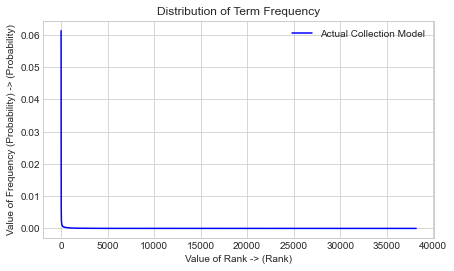

In [16]:
# Plot the result and compare the plot
plt.figure(figsize = (7, 4))
plt.title('Distribution of Term Frequency')

r = list(zip(*ranking))[1]
p = list(zip(*probability))[1]

plt.plot(r, p, 'b-', label = "Actual Collection Model")

plt.xlabel('Value of Rank -> (Rank)')
plt.ylabel('Value of Frequency (Probability) -> (Probability)')
plt.legend()
plt.show()

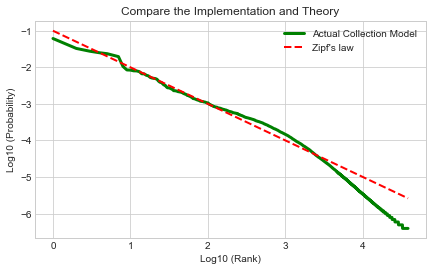

In [17]:
# Plot the result and compare the plot
plt.figure(figsize = (7, 4))
plt.title('Compare the Implementation and Theory')
plt.plot(log_r, log_p, 'g-', label = "Actual Collection Model", linewidth = 3)

# Ideal situation, c = 0.1
vocab = [np.true_divide(0.1, word[1]) for word in ranking]
ideal_log_p = np.log10(vocab)

plt.plot(log_r, ideal_log_p, color = 'red', label = "Zipf's law", linewidth = 2, ls = '--')

# plt.scatter(log_r, log_p, marker = '.', label = "empirical dist.")

plt.xlabel('Log10 (Rank)')
plt.ylabel('Log10 (Probability)')
plt.legend()
plt.show()

In [22]:
# Convert the tuple into the pd dataframe to observe the distribution
# Word
vocabulary = [word[0] for word in ranking]
word = pd.DataFrame(vocabulary, columns = ["Word"])

# Frequency
f_q = [frq[1] for frq in frequency]
freq = pd.DataFrame(f_q, columns = ["Frequency"])

# Ranking
r_k = [rank[1] for rank in ranking]
rank = pd.DataFrame(r_k, columns = ["Rank"])

# Probability
p_b = [prob[1]*100 for prob in probability]
prob = pd.DataFrame(p_b, columns = ["Probability(%)"])

# Rank * Probability
element = [value[1] for value in r_Pr]
rPr = pd.DataFrame(element, columns = ["Rank * Probability"])

# Concat each pd dataframe and show the distribution table
result = pd.concat([word, freq, rank, prob, rPr], axis = 1)
result.head(15)

# passage_file.close()

,Word,Frequency,Rank,Probability(%),Rank * Probability
0,the,622419,1,6.132931,0.061329
1,of,333419,2,3.285304,0.065706
2,a,279341,3,2.752453,0.082574
3,and,253633,4,2.499142,0.099966
4,to,239433,5,2.359224,0.117961
5,is,217327,6,2.141405,0.128484
6,in,198978,7,1.960606,0.137242
7,for,107559,8,1.059820,0.084786
8,you,86004,9,0.847430,0.076269
9,or,85216,10,0.839666,0.083967


In [29]:
# Calculate the standard deviation
print(np.std(element))

0.08320504232913402
0.030495462971707004


## Question 2: Inverted Index (20 marks)

In [2]:
import csv
from collections import Counter

# PID dictionary

# Define the each query dictionary
QueryResult = defaultdict(dict)
# Count the frequency of the word
d1_result = defaultdict(dict)

# Use the stopwords package
stop_words = set(stopwords.words('english'))
stemming = PorterStemmer()

def filter_word(sentence):
    # Only remain the english words 
    # Remove the URL link (Regular expression)
    sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
    # Split the line, Remove the whitespaces and Convert each words into the type of lower case
    sentence = nltk.word_tokenize(sentence.lower())
    # Remove the punctuations
    sentence = [word for word in sentence if word not in string.punctuation]
    # Remove the digits (search whether the word contain the digits) => type None or string
    sentence = [word for word in sentence if re.search('\d', word) == None] 
    # Remove the stop words 
    sentence = [word for word in sentence if word not in stop_words]
    # Remove the single alphabet
    sentence = [word for word in sentence if len(word) > 1]
    # Add the stemming process
    sentence = [stemming.stem(word) for word in sentence]
    
    return sentence

# dict[key] = [(pid, frequency, tf-idf), (pid, frequency, tf-idf)....]
# dict[key] = count
def merge_two_dict(data1, data2):
    for key in data2.keys():
        if key in data1:
            data1[key] += data2[key]
        else:
            data1[key] = data2[key]
    return data1


# Open the candidaate_passages_top1000.tsv file
with open("candidate_passages_top1000.tsv", encoding = "utf-8") as file:
    reader = list(csv.reader(file, delimiter = "\t", quotechar = '"'))
    # Sorting the qid with ascending order 
    sorting_list = sorted(reader)
    
    calculate_idf = defaultdict(int)
    
    # Record the qid to check whether in the same query
    qid_check = set()
    
    for sentence in sorting_list:
       
        pid_of_word = filter_word(sentence[3])
        calculate_idf[sentence[0]] = calculate_idf[sentence[0]] + 1
        sentence_temp = {}
        
        # Calculate the frequency and the TF value 
        for word in pid_of_word:                
            if word in sentence_temp:
                sentence_temp[word][0][1] += 1
                sentence_temp[word][0][2] += np.true_divide(1, len(pid_of_word))
            else:
                sentence_temp[word] = [[sentence[1], 1, np.true_divide(1, len(pid_of_word))]]
        
        QueryResult[sentence[0]] = merge_two_dict(QueryResult[sentence[0]], sentence_temp)
        d1_result[sentence[0]] = merge_two_dict(d1_result[sentence[0]], Counter(set(pid_of_word)))
        
    # Calculate the IDF value
    for qid in QueryResult.keys():
        for word in QueryResult[qid].keys():
            for index in range(len(QueryResult[qid][word])):
                QueryResult[qid][word][index][2] *=  np.log10(np.true_divide(calculate_idf[qid], d1_result[qid][word]))

## Question 3: Retrieval Models (30 marks)

In [3]:
# Define the each query dictionary
qid_token = defaultdict(dict)
# Count the frequency of the word
q1_result = defaultdict(dict)

# Open the candidaate_passages_top1000.tsv file
with open("candidate_passages_top1000.tsv", encoding = "utf-8") as file:
    reader = list(csv.reader(file, delimiter = "\t", quotechar = '"'))

    c_idf = defaultdict(int)
    
    for sentence in reader:
       
        c_idf[sentence[0]] = c_idf[sentence[0]] + 1
        
        if sentence[0] not in qid_token:
            qid_temp = defaultdict(int)
            qid_of_word = filter_word(sentence[2])
            pid_of_word = filter_word(sentence[3])
            
            # Calculate the TF value 
            for word in qid_of_word:
                qid_temp[word] += np.true_divide(1, len(qid_of_word)) 
        
            qid_token[sentence[0]] = merge_two_dict(qid_token[sentence[0]], qid_temp) 
            q1_result[sentence[0]] = merge_two_dict(q1_result[sentence[0]], Counter(set(pid_of_word)))
        
    # Calculate the IDF value
    for qid in qid_token.keys():
        for word in qid_token[qid].keys():
            if word not in q1_result[qid]:
                qid_token[qid][word] = 1
            else:
                qid_token[qid][word] *=  np.log10(np.true_divide(c_idf[qid], q1_result[qid][word]))

## Vector Space Model

In [3]:
# Open the csv_file and define the name of each column
VM_table = pd.read_csv("candidate_passages_top1000.tsv", sep = '\t', header = None, names = ["qid", "pid", "query", "passage"])
Vector_Space_Model = defaultdict(dict)
VM_query_idx = defaultdict(dict)

In [4]:
class Text_Preprocessing:
    def __init__(self):
        self.symbol = re.compile(r'[\w]+')
        # remove the stopwords
        self.remain_words = set(stopwords.words('english'))
        # remove the suffix (normalization)
        self.stemming = PorterStemmer()
    
    # In this section, we will add more steps in text-preprocessing
    def filter_word(self, sentence):
        # Remove the URL link (Regular expression)
        sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
        # Conver to the lower case
        each_word = self.symbol.findall(sentence.lower())
        # Remove the punctuations
        each_word = [word for word in each_word if word not in string.punctuation]
        # Remove the stop words
        if self.remain_words is not None:
            each_word = [word for word in each_word if word not in self.remain_words]
        # Implement the stemming
        if self.stemming is not None:
            each_word = [self.stemming.stem(word) for word in each_word]
        # Remove the single alphabet
        each_word = [word for word in each_word if len(word) > 1]
        # Count the frequency
        result = dict(Counter(each_word))
        return result

In [5]:
# Through the inverted index (Query_Result) to calculate the value and store in the BM25_Model
for query_id in VM_table["qid"].unique():
    temp_table = VM_table[VM_table["qid"] == query_id]
    Vector_Space_Model[query_id] = temp_table["query"].values[0]
    vm_qvalues = temp_table["pid"].values
    vm_pvalues = temp_table["passage"].values
    VM_query_idx[query_id] = Query_Result(vm_qvalues, vm_pvalues)

In [4]:
# Record the pid and word
pid_word = defaultdict(list)

for qid in QueryResult.keys():
    for word in QueryResult[qid].keys():
        for index in range(len(QueryResult[qid][word])):
            pid_word[QueryResult[qid][word][index][0]] += [(word, QueryResult[qid][word][index][2])] 

In [5]:
Vector_Space_Model = defaultdict(list)

# Run 1000 pid 
for qid in qid_token.keys():
    query_value = 0
    
    for word in qid_token[qid].keys():
        query_value = query_value + qid_token[qid][word]**2
    query_sqrt = np.sqrt(query_value)
    
    for pid in pid_word.keys():
        tfidf_value = 0
        for word, tfidf in pid_word[pid]:
            tfidf_value = tfidf_value + tfidf**2
        tfidf_sqrt = np.sqrt(tfidf_value)
        
        dot = 0
        
        for word, tfidf in pid_word[pid]:
            if word in qid_token[qid]:
                dot = dot + tfidf * qid_token[qid][word]  
        vsm_value = np.true_divide(dot, query_sqrt * tfidf_sqrt)
        Vector_Space_Model[qid] += [(vsm_value, pid)]
    
    Vector_Space_Model[qid].sort(reverse = True)

In [6]:
# Write the result in the txt file
VS_txt = open("VS.txt", "w", encoding = "utf-8")
for qid in Vector_Space_Model.keys():
    m = 0
    for vsm_value, pid in Vector_Space_Model[qid][0 : 100]:
        txt.write(f"<{qid} A1 {pid} {m + 1} {vsm_value} VS>\n")
VS_txt.close()

## BM25 Model

In [8]:
# Open the csv_file and define the name of each column
BM_table = pd.read_csv("candidate_passages_top1000.tsv", sep = '\t', header = None, names = ["qid", "pid", "query", "passage"])
BM25_Model = defaultdict(dict)
BM25_query_idx = defaultdict(dict)

In [9]:
class Text_Preprocessing:
    def __init__(self):
        self.symbol = re.compile(r'[\w]+')
        # remove the stopwords
        self.remain_words = set(stopwords.words('english'))
        # remove the suffix (normalization)
        self.stemming = PorterStemmer()
    
    # In this section, we will add more steps in text-preprocessing
    def filter_word(self, sentence):
        # Remove the URL link (Regular expression)
        sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
        # Conver to the lower case
        each_word = self.symbol.findall(sentence.lower())
        # Remove the punctuations
        each_word = [word for word in each_word if word not in string.punctuation]
        # Remove the stop words
        if self.remain_words is not None:
            each_word = [word for word in each_word if word not in self.remain_words]
        # Implement the stemming
        if self.stemming is not None:
            each_word = [self.stemming.stem(word) for word in each_word]
        # Remove the single alphabet
        each_word = [word for word in each_word if len(word) > 1]
        # Count the frequency
        result = dict(Counter(each_word))
        return result

In [10]:
# Through the inverted index (Query_Result) to calculate the value and store in the BM25_Model
for query_id in BM_table["qid"].unique():
    temp_table = BM_table[BM_table["qid"] == query_id]
    BM25_Model[query_id] = temp_table["query"].values[0]
    bm_qvalues = temp_table["pid"].values
    bm_pvalues = temp_table["passage"].values
    BM25_query_idx[query_id] = Query_Result(bm_qvalues, bm_pvalues)

In [11]:
# Define the BM25 model structure
class BM25_Model_Structure:
    def __init__(self, document):
        self.position = document
        self.clean = document.clean
    
    # Calculate the similarity
    def similarity(self, term_of_query, preprocess_query, passage_id):
        mark = 0
        average_passage_length = self.position.average_length_of_passage
        for word in preprocess_query:
            if word in self.position.term_of_passage(passage_id):
                # Calculate the k1 ((1 - b) + b * dl/avgdl)
                K = define_K(self.position.length_of_passage(passage_id), average_passage_length)
                # Calculate the fm * (k1 + 1) / (K + fm)
                fm = self.position.term_of_passage(passage_id)[word]
                top_element = np.multiply(fm, (1.2 + 1))
                down_element = K + fm
                frac_value = np.true_divide(top_element, down_element)
                # Add the other items and return the final mark
                mark = mark + np.multiply(term_of_query[word], frac_value)
        return mark
    
    def calculate_query_term_of_score(self, preprocess_query):
        term_of_query = defaultdict(dict)
        remove = [word for word in preprocess_query if not self.position.exist(word)]
        preprocess_query = eliminate(remove, preprocess_query)
        for word, qfm in preprocess_query.items():
            # Calculate the log((N - nm + 0.5) / (nm + 0.5))
            # Calculate the qfm * (k2 + 1) / (k2 + qfm)
            # Through the define_log_lastitem return the multiply result
            nm = self.position.count_of_passages(word)
            N = self.position.total_passage
            term_of_query[word] = define_log_lastitem(qfm, nm, N)
        return term_of_query
    
    # Through the similarity (relevance) to sorting the final result
    def order(self, query):
        preprocess_query = self.clean.filter_word(query)
        term_of_query = self.calculate_query_term_of_score(preprocess_query)
        total_mark = [[self.similarity(term_of_query, preprocess_query, passage_id), passage_id] for passage_id in self.position.obtain_pids(query)]
        order_list = reorder(total_mark)
        return order_list

In [12]:
# Write the result in the txt file
txt = open("BM25.txt", "w", encoding = "utf-8")
for qid, query in BM25_Model.items():
    # Sorting the similarity (score)
    final_list = BM25_Model_Structure(BM25_query_idx[qid]).order(query)
    for m, (bm_value, pid) in enumerate(final_list[0 : 100]):
        txt.write(f"<{qid} A1 {pid} {m + 1} {bm_value} BM25>\n")
txt.close()

## Question 4: Retrieval Models, Language Modelling  (30 marks)

In [13]:
# Define the basic model to calculate the score and do the order procedure
# Among three model will depend on this class Formula
class Formula:
    def __init__(self, document):
        self.position = document
        self.clean = document.clean
    
    # Through the similarity (relevance) to sorting the final result
    def order(self, query):
        preprocess_query = self.clean.filter_word(query)
        remove = [word for word in preprocess_query if not self.position.exist(word)]
        term_of_query = eliminate(remove, preprocess_query)
        total_mark = [[self.similarity(term_of_query, passage_id), passage_id] for passage_id in self.position.obtain_pids(query)]
        order_list = reorder(total_mark) 
        return order_list

## Laplace Smoothing Model

In [14]:
# Open the csv_file and define the name of each column
La_table = pd.read_csv("candidate_passages_top1000.tsv", sep = '\t', header = None, names = ["qid", "pid", "query", "passage"])
Laplace_Smoothing_Model = defaultdict(dict)
Laplace_Smoothing_query_idx = defaultdict(dict)

In [15]:
class Text_Preprocessing:
    def __init__(self):
        self.symbol = re.compile(r'[\w]+')
        # remove the stopwords
        self.remain_words = set(stopwords.words('english'))
        # remove the suffix (normalization)
        self.stemming = PorterStemmer()
    
    # In this section, we will add more steps in text-preprocessing
    def filter_word(self, sentence):
        # Remove the URL link (Regular expression)
        sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
        # Conver to the lower case
        each_word = self.symbol.findall(sentence.lower())
        # Remove the punctuations
        each_word = [word for word in each_word if word not in string.punctuation]
        # Remove the stop words
        if self.remain_words is not None:
            each_word = [word for word in each_word if word not in self.remain_words]
        # Implement the stemming
        if self.stemming is not None:
            each_word = [self.stemming.stem(word) for word in each_word]
        # Remove the single alphabet
        each_word = [word for word in each_word if len(word) > 1]
        # Count the frequency
        result = dict(Counter(each_word))
        return result

In [16]:
# Through the inverted index (Query_Result) to calculate the value and store in the Laplace_Smoothing_Model
for query_id in La_table["qid"].unique():
    temp_table = La_table[La_table["qid"] == query_id]
    Laplace_Smoothing_Model[query_id] = temp_table["query"].values[0]
    La_qvalues = temp_table["pid"].values
    La_pvalues = temp_table["passage"].values
    Laplace_Smoothing_query_idx[query_id] = Query_Result(La_qvalues, La_pvalues)

In [17]:
# Define the Laplace smoothing model structure
class Laplace_Smoothing_Model_Structure(Formula):
    def similarity(self, term_of_query, passage_id):
        mark = 0
        for element in term_of_query:
            frequency = check_frequency(element, self.position.term_of_passage(passage_id))
            # Calculate the probability D(word) + 1 / (|D| + |V|)
            top_element = frequency + 1
            down_element = self.position.length_of_passage(passage_id) + self.position.V
            log_value = np.true_divide(top_element, down_element)
            # Calculate the log-probability
            mark = mark + np.log(log_value)
        return mark

In [18]:
# Write the result in the txt file
La_txt = open("LM-Laplace.txt", "w", encoding = "utf-8")
for qid, query in Laplace_Smoothing_Model.items():
    # Sorting the similarity (score)
    final_list = Laplace_Smoothing_Model_Structure(Laplace_Smoothing_query_idx[qid]).order(query)
    for m, (La_value, pid) in enumerate(final_list[0 : 100]):
        La_txt.write(f"<{qid} A1 {pid} {m + 1} {La_value} LM-Laplace>\n")
La_txt.close()

## Lidstone Smoothing Model

In [19]:
# Open the csv_file and define the name of each column
Lidstone_table = pd.read_csv("candidate_passages_top1000.tsv", sep = '\t', header = None, names = ["qid", "pid", "query", "passage"])
Lidstone_Smoothing_Model = defaultdict(dict)
Lidstone_Smoothing_query_idx = defaultdict(dict)

In [20]:
class Text_Preprocessing:
    def __init__(self):
        self.symbol = re.compile(r'[\w]+')
        # remove the stopwords
        self.remain_words = set(stopwords.words('english'))
        # remove the suffix (normalization)
        self.stemming = PorterStemmer()
    
    # In this section, we will add more steps in text-preprocessing
    def filter_word(self, sentence):
        # Remove the URL link (Regular expression)
        sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
        # Conver to the lower case
        each_word = self.symbol.findall(sentence.lower())
        # Remove the punctuations
        each_word = [word for word in each_word if word not in string.punctuation]
        # Remove the stop words
        if self.remain_words is not None:
            each_word = [word for word in each_word if word not in self.remain_words]
        # Implement the stemming
        if self.stemming is not None:
            each_word = [self.stemming.stem(word) for word in each_word]
        # Remove the single alphabet
        each_word = [word for word in each_word if len(word) > 1]
        # Count the frequency
        result = dict(Counter(each_word))
        return result 

In [21]:
# Through the inverted index (Query_Result) to calculate the value and store in the Lidstone_Smoothing_Model
for query_id in Lidstone_table["qid"].unique():
    temp_table = Lidstone_table[Lidstone_table["qid"] == query_id]
    Lidstone_Smoothing_Model[query_id] = temp_table["query"].values[0]
    Lid_qvalues = temp_table["pid"].values
    Lid_pvalues = temp_table["passage"].values
    Lidstone_Smoothing_query_idx[query_id] = Query_Result(Lid_qvalues, Lid_pvalues)

In [22]:
# Define the Lidstone smoothing model structure
class Lidstone_Smoothing_Model_Structure(Formula):
    def similarity(self, term_of_query, passage_id):
        mark = 0
        for element in term_of_query:
            frequency = check_frequency(element, self.position.term_of_passage(passage_id))
            # Calculate the probability D(word) + epilson / (|D| + epilson * |V|)
            # epilson = 0.5
            top_element = frequency + 0.5
            down_element = self.position.length_of_passage(passage_id) + np.multiply(0.5, self.position.V)
            log_value = np.true_divide(top_element, down_element)
            # Calculate the log-probability
            mark = mark + np.log(log_value)
        return mark

In [23]:
# Write the result in the txt file
Lid_txt = open("LM-Lidstone.txt", "w", encoding = "utf-8")
for qid, query in Lidstone_Smoothing_Model.items():
    # Sorting the similarity (score)
    final_list = Lidstone_Smoothing_Model_Structure(Lidstone_Smoothing_query_idx[qid]).order(query)
    for m, (Lid_value, pid) in enumerate(final_list[0 : 100]):
        Lid_txt.write(f"<{qid} A1 {pid} {m + 1} {Lid_value} LM-Lidstone>\n")
Lid_txt.close()

## Dirichlet Smoothing Model

In [24]:
# Open the csv_file and define the name of each column
Dirichlet_table = pd.read_csv("candidate_passages_top1000.tsv", sep = '\t', header = None, names = ["qid", "pid", "query", "passage"])
Dirichlet_Smoothing_Model = defaultdict(dict)
Dirichlet_Smoothing_query_idx = defaultdict(dict)

In [25]:
class Text_Preprocessing:
    def __init__(self):
        self.symbol = re.compile(r'[\w]+')
        # remove the stopwords
        self.remain_words = set(stopwords.words('english'))
        # remove the suffix (normalization)
        self.stemming = PorterStemmer()
    
    # In this section, we will add more steps in text-preprocessing
    def filter_word(self, sentence):
        # Remove the URL link (Regular expression)
        sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),] | (?:%[0-9a-fA-F][0-9a-fA-F])) +', '', sentence, flags = re.MULTILINE)
        # Conver to the lower case
        each_word = self.symbol.findall(sentence.lower())
        # Remove the punctuations
        each_word = [word for word in each_word if word not in string.punctuation]
        # Remove the stop words
        if self.remain_words is not None:
            each_word = [word for word in each_word if word not in self.remain_words]
        # Implement the stemming
        if self.stemming is not None:
            each_word = [self.stemming.stem(word) for word in each_word]
        # Remove the single alphabet
        each_word = [word for word in each_word if len(word) > 1]
        # Count the frequency
        result = dict(Counter(each_word))
        return result 

In [26]:
# Through the inverted index (Query_Result) to calculate the value and store in the Dirichlet_Smoothing_Model
for query_id in Dirichlet_table["qid"].unique():
    temp_table = Dirichlet_table[Dirichlet_table["qid"] == query_id]
    Dirichlet_Smoothing_Model[query_id] = temp_table["query"].values[0]
    Dir_qvalues = temp_table["pid"].values
    Dir_pvalues = temp_table["passage"].values
    Dirichlet_Smoothing_query_idx[query_id] = Query_Result(Dir_qvalues, Dir_pvalues)

In [27]:
# Define the Dirichlet smoothing model structure
class Dirichlet_Smoothing_Model_Structure(Formula):
    def similarity(self, term_of_query, passage_id):
        # Calculate the |D| / |D| + u (previous) and u / |D| + u values (latter)
        previous, latter = define_item(self.position.length_of_passage(passage_id))
        mark = 0
        for element in term_of_query:
            frequency = check_frequency(element, self.position.term_of_passage(passage_id))
            # Calculate the P(word | D)
            P_WD = posterior(frequency, self.position.length_of_passage(passage_id))
            # Calculate the P(word | C)
            P_WC = posterior(self.position.get_corpus_count(element), self.position.C)
            # Multiply the corresponding items 
            log_value = np.multiply(previous, P_WD) + np.multiply(latter, P_WC)
            # Calculate the log-probability
            mark = mark + np.log(log_value)
        return mark

In [28]:
# Write the result in the txt file
Dir_txt = open("LM-Dirichlet.txt", "w", encoding = "utf-8")
for qid, query in Dirichlet_Smoothing_Model.items():
    # Sorting the similarity (score)
    final_list = Dirichlet_Smoothing_Model_Structure(Dirichlet_Smoothing_query_idx[qid]).order(query)
    for m, (Dir_value, pid) in enumerate(final_list[0 : 100]):
        Dir_txt.write(f"<{qid} A1 {pid} {m + 1} {Dir_value} LM-Dirichlet>\n")
Dir_txt.close()